In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc


In [4]:
# Load the dataset
data = pd.read_csv('data.csv')

In [5]:
# EDA
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None

Dataset Description:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.43894

<Figure size 2000x1500 with 0 Axes>

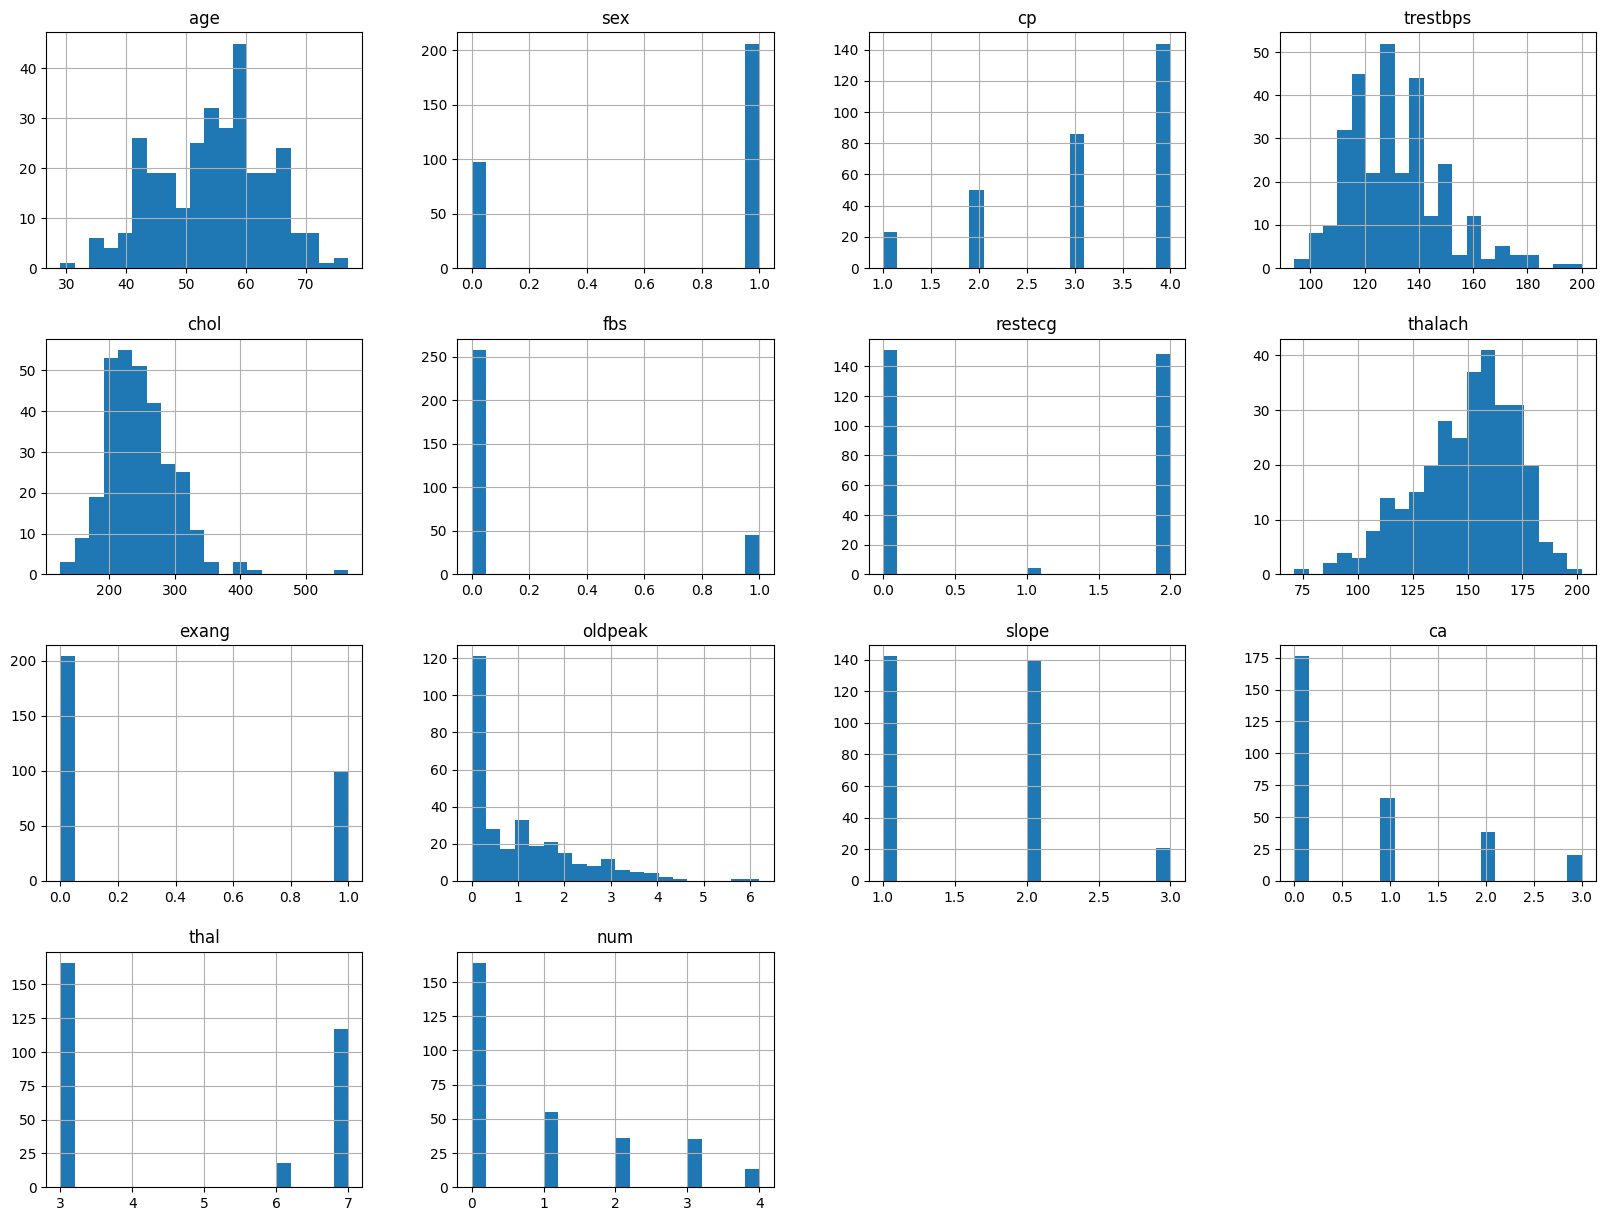

In [6]:
# Visualization of distributions
plt.figure(figsize=(20, 15))
data.hist(bins=20, figsize=(20, 15))
plt.show()

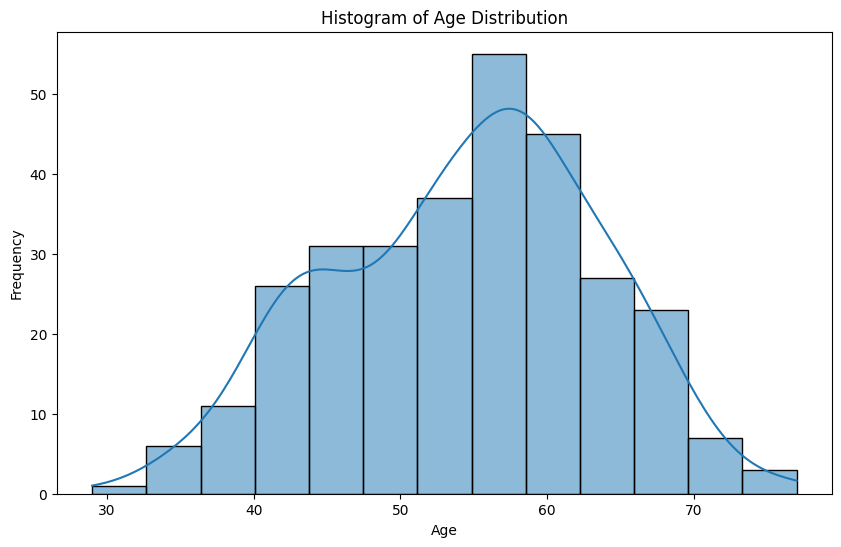

In [7]:
# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

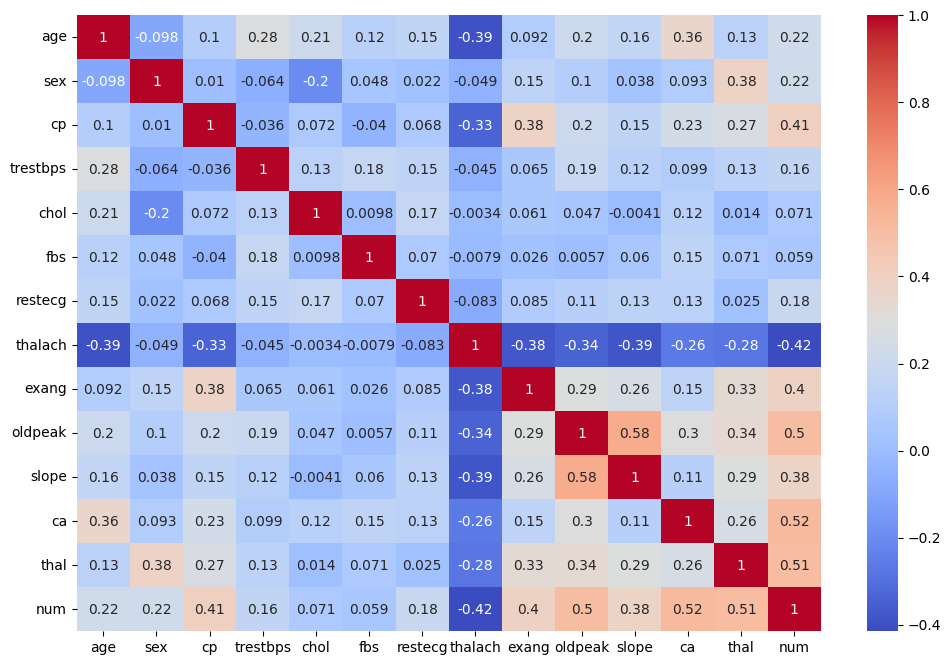

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

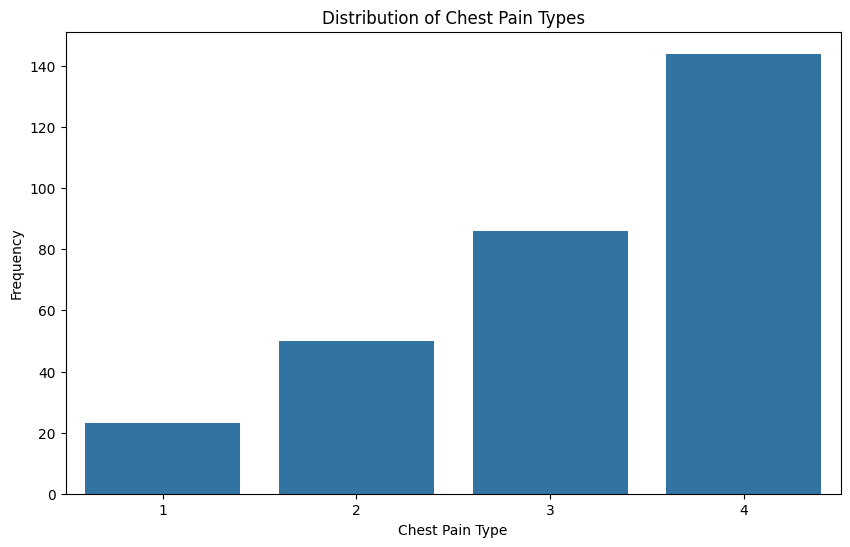

In [9]:
# Visualization of Chest Pain Types
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=data)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

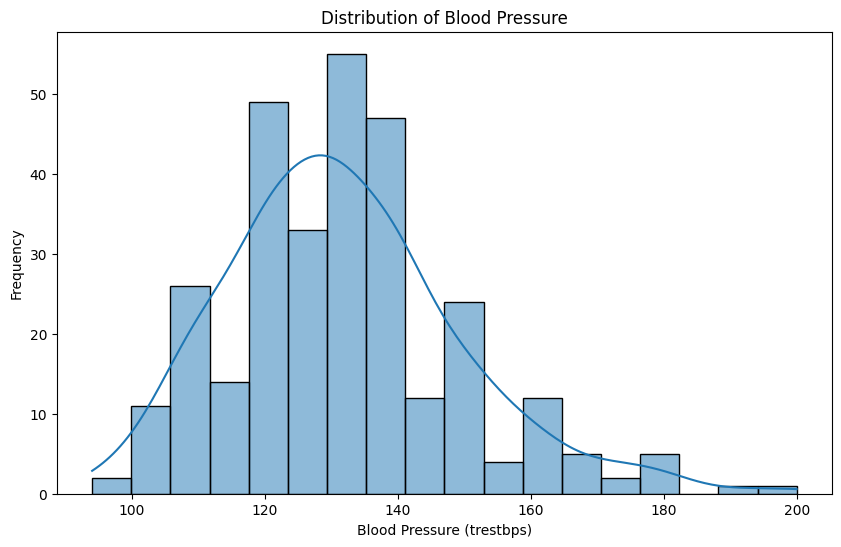

In [10]:
# Visualization of Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(data['trestbps'], kde=True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (trestbps)')
plt.ylabel('Frequency')
plt.show()

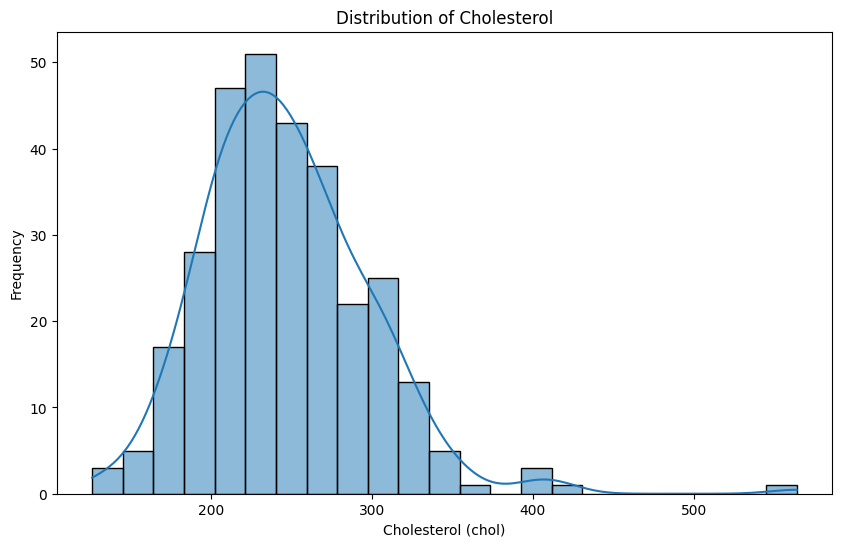

In [11]:
# Visualization of Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(data['chol'], kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol (chol)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Handle missing values
data['ca'].fillna(data['ca'].mean(), inplace=True)
data['thal'].fillna(data['thal'].mean(), inplace=True)

In [13]:
# Transform 'num' variable to binary classification
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

In [14]:
# Feature scaling
X = data.drop('num', axis=1)
y = data['num']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
# Gaussian Process Classification
kernel = C(1.0, (1e-4, 1e1)) * RBF(1, (1e-4, 1e1))
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)
y_pred_gpc = gpc.predict(X_test)
y_proba_gpc = gpc.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [17]:
# Evaluate Gaussian Process Classifier
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)
roc_auc_gpc = roc_auc_score(y_test, y_proba_gpc)
precision_gpc = precision_score(y_test, y_pred_gpc)
recall_gpc = recall_score(y_test, y_pred_gpc)
f1_gpc = f1_score(y_test, y_pred_gpc)

In [18]:
# Print Gaussian Process Classifier Results
print("Gaussian Process Classifier Results:")
print(f"Accuracy: {accuracy_gpc}")
print(f"ROC-AUC: {roc_auc_gpc}")
print(f"Precision: {precision_gpc}")
print(f"Recall: {recall_gpc}")
print(f"F1 Score: {f1_gpc}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gpc))

Gaussian Process Classifier Results:
Accuracy: 0.8461538461538461
ROC-AUC: 0.9050387596899224
Precision: 0.8085106382978723
Recall: 0.8837209302325582
F1 Score: 0.8444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.81      0.88      0.84        43

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



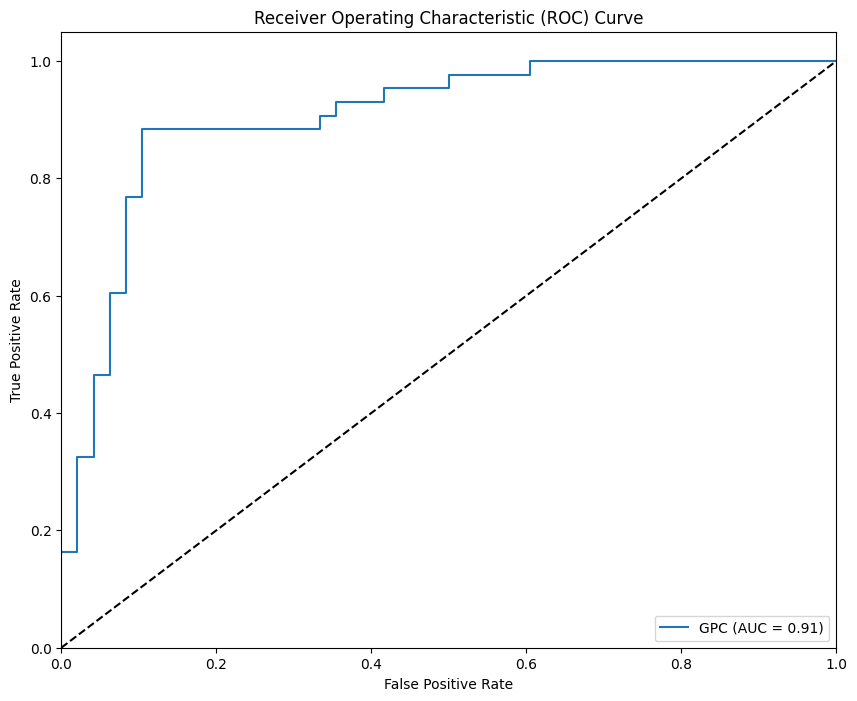

In [19]:
# Plot ROC curve for Gaussian Process Classifier
fpr, tpr, _ = roc_curve(y_test, y_proba_gpc)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'GPC (AUC = {roc_auc_gpc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
# Summary statistics of numerical variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
summary_stats = data[numerical_vars].describe()
print("\nSummary Statistics of Numerical Variables:")
print(summary_stats)


Summary Statistics of Numerical Variables:
              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


In [21]:
# Performance metrics summary table
performance_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy_gpc, roc_auc_gpc, precision_gpc, recall_gpc, f1_gpc]
})
print("\nPerformance Metrics Summary Table:")
print(performance_metrics)


Performance Metrics Summary Table:
      Metric     Value
0   Accuracy  0.846154
1    ROC-AUC  0.905039
2  Precision  0.808511
3     Recall  0.883721
4   F1 Score  0.844444


In [22]:
# Explanation of the performance metrics table
print("\nExplanation of Performance Metrics:")
print("1. Accuracy: The proportion of correctly classified instances among the total instances.")
print("2. ROC-AUC: The Area Under the Receiver Operating Characteristic Curve, indicating the model's ability to distinguish between classes.")
print("3. Precision: The proportion of true positive instances among the instances predicted as positive.")
print("4. Recall: The proportion of true positive instances among the actual positive instances.")
print("5. F1 Score: The harmonic mean of precision and recall, providing a single metric to evaluate the model's performance.")


Explanation of Performance Metrics:
1. Accuracy: The proportion of correctly classified instances among the total instances.
2. ROC-AUC: The Area Under the Receiver Operating Characteristic Curve, indicating the model's ability to distinguish between classes.
3. Precision: The proportion of true positive instances among the instances predicted as positive.
4. Recall: The proportion of true positive instances among the actual positive instances.
5. F1 Score: The harmonic mean of precision and recall, providing a single metric to evaluate the model's performance.
